In [1]:
#Calling the necessary library
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from art.attacks.evasion import ZooAttack
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
import platform
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from art.estimators.classification import SklearnClassifier


C:\Users\abdul\anaconda3\lib\site-packages\art\estimators\certification\__init__.py:28: UserWarning: PyTorch not found. Not importing DeepZ or Interval Bound Propagation functionality
  warnings.warn("PyTorch not found. Not importing DeepZ or Interval Bound Propagation functionality")


In [2]:
cd "../"

C:\Users\abdul\Desktop\Untitled Folder\Covid_AI_Research_Lab\Machine_Learning


In [3]:
cd "../"

C:\Users\abdul\Desktop\Untitled Folder\Covid_AI_Research_Lab


In [4]:
#Reading the pre_processed data

os_type = platform.system()
if os_type.startswith("Darwin"): #for macOS
    data = pd.read_excel(r"dataset/processed_data/main/merged_scored_dataset1.xlsx")
else: 
    data = pd.read_excel(r"dataset\processed_data\main\merged_scored_dataset1.xlsx")
#Creating flag col depending on the quartile
data['flag'] = 1  # Initialize the 'flag' column with 3
data.loc[data['Laboratory confirmed, since the beginning of the pandemic Hospitalized'] <= 449, 'flag'] = 0
#data.loc[data['Laboratory confirmed, since the beginning of the pandemic Hospitalized'] <= 290, 'flag'] = 1
target_col = data["flag"]

In [5]:
data.head()

,District,"Laboratory confirmed, since the beginning of the pandemic TOTAL","Laboratory confirmed, since the beginning of the pandemic Difference from","Laboratory confirmed, since the beginning of the pandemic Hospitalized","Laboratory confirmed, since the beginning of the pandemic Deceased","Laboratory confirmed, since the beginning of the pandemic RecoveredA","Laboratory confirmed, since the beginning of the pandemic Current CasesB","Reported, the last 7 days,Incidence per 100, Incidence per 100 ,+USAFD","Reported, the last 7 days,Incidence per 100, Incidence per 100 ,<20 Jahre","Reported, the last 7 days,Incidence per 100, Incidence per 100 ,20-59 JahreE","Reported, the last 7 days,Incidence per 100, Incidence per 100 ,>=60 Jahre",Recovery Rate,Hospitalization Rate,Score,Cluster,flag
0,Ahrweiler,4577,4,199,52.0,4423,102,50.0,132.2,49.0,7.1,0.775972,0.176385,0.299794,1,0
1,Altenkirchen,4956,0,411,101.0,4833,22,8.5,8.4,12.1,2.6,0.785770,0.348355,0.218708,5,0
2,Alzey-Worms,5130,1,304,123.0,4970,37,9.3,24.0,4.4,8.2,0.769890,0.269208,0.250341,4,0
3,Bad Dürkheim,4499,1,305,150.0,4303,46,14.3,21.6,19.5,2.3,0.773656,0.284613,0.244521,4,0
4,Bad Kreuznach,6121,0,160,142.0,5923,56,18.3,41.4,20.0,2.0,0.769510,0.080549,0.344480,2,0


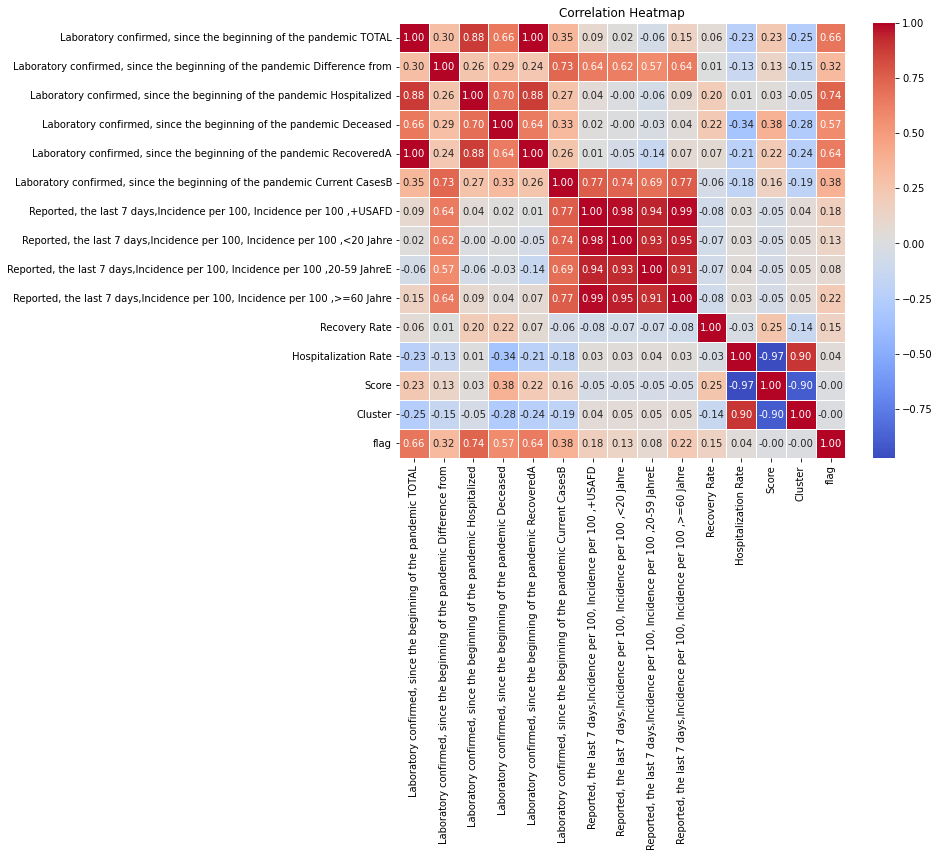

In [6]:
# Finding highly correlated features
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [7]:
#data.head()
#Droping the highly correlated features
features = data.drop("Laboratory confirmed, since the beginning of the pandemic Hospitalized", axis=1)
#Droping district as it is now represented as cluster
features = features.drop("District",axis=1)
features = features.drop("Laboratory confirmed, since the beginning of the pandemic TOTAL",axis=1)
features = features.drop("Laboratory confirmed, since the beginning of the pandemic RecoveredA",axis=1)
features = features.drop("Laboratory confirmed, since the beginning of the pandemic Deceased",axis=1)
#droping the terget col
features = features.drop("flag",axis = 1)
features.head()

,"Laboratory confirmed, since the beginning of the pandemic Difference from","Laboratory confirmed, since the beginning of the pandemic Current CasesB","Reported, the last 7 days,Incidence per 100, Incidence per 100 ,+USAFD","Reported, the last 7 days,Incidence per 100, Incidence per 100 ,<20 Jahre","Reported, the last 7 days,Incidence per 100, Incidence per 100 ,20-59 JahreE","Reported, the last 7 days,Incidence per 100, Incidence per 100 ,>=60 Jahre",Recovery Rate,Hospitalization Rate,Score,Cluster
0,4,102,50.0,132.2,49.0,7.1,0.775972,0.176385,0.299794,1
1,0,22,8.5,8.4,12.1,2.6,0.785770,0.348355,0.218708,5
2,1,37,9.3,24.0,4.4,8.2,0.769890,0.269208,0.250341,4
3,1,46,14.3,21.6,19.5,2.3,0.773656,0.284613,0.244521,4
4,0,56,18.3,41.4,20.0,2.0,0.769510,0.080549,0.344480,2


In [8]:
X_train, X_test, y_train, y_test = train_test_split(features, target_col, test_size=0.3, random_state=29)

In [9]:
mse_value = []
estimators_ = []
for estimator in range(30,170):
    RF_model = RandomForestRegressor(n_estimators = estimator ,random_state= 22)
    RF_model.fit(X_train,y_train)
    y_pred = RF_model.predict(X_test)
    estimators_.append(estimator)
    mse_value.append(mean_squared_error(y_test, y_pred))
     

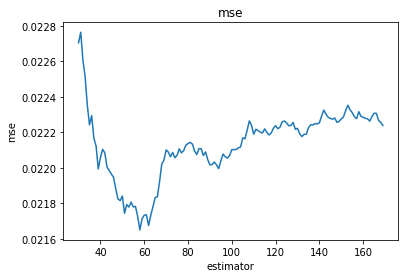

In [10]:
import matplotlib.pyplot as plt
plt.plot(estimators_, mse_value)
plt.title('mse')
plt.xlabel('estimator')
plt.ylabel('mse')
plt.show()

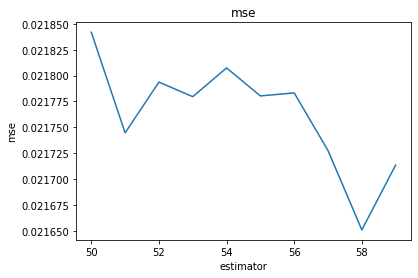

In [11]:
plt.plot(estimators_[20:30], mse_value[20:30])
plt.title('mse')
plt.xlabel('estimator')
plt.ylabel('mse')
plt.show()

In [12]:
#Selecting 58 as estimator as it was the lowest mse
Random_forest_model_for_COVID = RandomForestClassifier(n_estimators=58, random_state= 22)
Random_forest_model_for_COVID.fit(X=X_train, y=y_train)
y_pred = Random_forest_model_for_COVID.predict(X_test)

In [13]:
#Evaluating the ML model before attack
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred,average='weighted')
precision = precision_score(y_test, y_pred,average='weighted')
f1 = f1_score(y_test, y_pred,average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.98
Recall: 0.98
Precision: 0.98
F1 Score: 0.98


# Starting the Zoo Attack #

In [16]:
# Create ART classifier for scikit-learn RandomForestClassifier
art_classifier = SklearnClassifier(model=Random_forest_model_for_COVID)

# Create ART Zeroth Order Optimization attack
zoo = ZooAttack(classifier=art_classifier, confidence=0.0, targeted=False, learning_rate=1e-1, max_iter=20,
                binary_search_steps=10, initial_const=1e-3, abort_early=True, use_resize=False, 
                use_importance=False, nb_parallel=1, batch_size=1, variable_h=0.2)

 # Generate adversarial samples with ART Zeroth Order Optimization attack
Zoo_x_train_adv = zoo.generate(X_train.values)

ZOO:   0%|          | 0/11690 [00:00<?, ?it/s]

In [18]:
np.save("Zoo_X_train.npy",Zoo_x_train_adv)

In [ ]:
x_train_adv = np.load("Zoo_X_train.npy")

In [19]:
x_test_adv = zoo.generate(X_test.values)

ZOO:   0%|          | 0/5010 [00:00<?, ?it/s]

In [20]:
np.save("Zoo_X_test.npy",x_test_adv)

In [ ]:
x_test_adv = np.load("Zoo_X_test.npy")

In [21]:
#Evaluating the ML model after attack
y_pred_adv = Random_forest_model_for_COVID.predict(x_test_adv)
accuracy = accuracy_score(y_test, y_pred_adv)
recall = recall_score(y_test, y_pred_adv,average='weighted')
precision = precision_score(y_test, y_pred_adv,average='weighted')
f1 = f1_score(y_test, y_pred_adv,average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.45
Recall: 0.45
Precision: 0.44
F1 Score: 0.43


# Retaining with Adverserial data #

In [ ]:
#Selecting 58 as estimator as it was the lowest mse
random_forest_model_with_adv_data = Random_forest_model_for_COVID.fit(X=x_train_adv, y=y_train)
y_pred_with_retain_adv_data = random_forest_model_with_adv_data.predict(X_test)

In [ ]:
#Evaluating the ML model before attack
accuracy = accuracy_score(y_test, y_pred_with_retain_adv_data)
recall = recall_score(y_test, y_pred_with_retain_adv_data,average='weighted')
precision = precision_score(y_test, y_pred_with_retain_adv_data,average='weighted')
f1 = f1_score(y_test, y_pred_with_retain_adv_data,average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")

In [ ]:
#Selecting 58 as estimator as it was the lowest mse
y_pred_with_retain_adv_data_x_test_adv = random_forest_model_with_adv_data.predict(x_test_adv)

In [ ]:
#Evaluating the ML model before attack
accuracy = accuracy_score(y_test, y_pred_with_retain_adv_data_x_test_adv)
recall = recall_score(y_test, y_pred_with_retain_adv_data_x_test_adv,average='weighted')
precision = precision_score(y_test, y_pred_with_retain_adv_data_x_test_adv,average='weighted')
f1 = f1_score(y_test, y_pred_with_retain_adv_data_x_test_adv,average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")